# MESA Assignment 2

AY550

Jeremy Quijano

CWID: 12128984

# Part (a)

## Create a model of the present-day sun with MESA by evolving a 1$M_\odot$ star to an age of 4.6 Gyr. Say how you chose your inlist to perform this simulation.



From the default inlist_project parameters I changed the following:
1) Changed 'initial_mass = 1 $M_\odot$' to simulate 1 $M_\odot$ star.

2) Changed 'stop_near_zams = .false.' so the simulation wouldn't stop early.

3) Added 'max_age = 4.6d9' to ensure that it stopped at correct age.


## What is the luminosity and central hydrogen fraction of this model?

In [340]:
print('Luminosity:', 10**history_1solarmass['log_L'][-1])
print('Central Hydrogen Fraction:', history_1solarmass['center_h1'][-1])

Luminosity: 0.9985044401202576
Central Hydrogen Fraction: 0.3443984530917985


## How does its radius compare to the actual solar radius?

In [341]:
print(history_1solarmass['log_R'][-1])
print(10**history_1solarmass['log_R'][-1] * const.R_sun)
print(const.R_sun)

0.0012880383305996959
697766382.2266608 m
  Name   = Nominal solar radius
  Value  = 695700000.0
  Uncertainty  = 0.0
  Unit  = m
  Reference = IAU 2015 Resolution B 3


The radius is roughly the same as the radius of the sun, but slightly larger.

# Part (b)

## Plot the pressure-density profiles of the MESA models at the beginning and end of the simulation. Compare these profiles to an $n = 3$ and $n = 1.5$ polytropic relation, in which $P = P_0 \rho^{(1 + 1/n)}$, with the same central density and pressure as the models.

In [325]:
# calculate P = P_c (rho / rho_c)^(1 + 1/n) for n = 1.5, 3
n15 = 1.5
n3  = 3.0

# find beginning and ending central pressures
P_c_beg = 10**history_1solarmass['log_cntr_P'][0]
P_c_end = 10**history_1solarmass['log_cntr_P'][-1]

# find beginning and ending central densities
rho_c_beg = 10**history_1solarmass['log_cntr_Rho'][0]
rho_c_end = 10**history_1solarmass['log_cntr_Rho'][-1]

# find beginning and ending densities
rho_beg = 10**profiles_1solarmass[0][1]['logRho']
rho_end = 10**profiles_1solarmass[-1][1]['logRho']

# function to find pressure
def pressure(P_c, rho, rho_c, n):
    P = np.zeros(len(rho))
    for i in range(len(rho)):
        P[i] = P_c * (rho[i] / rho_c)**(1. + (1. / n))
    return P

# calculate beginning pressure
P15_beg = pressure(P_c_beg, rho_beg, rho_c_beg, n15)
P3_beg = pressure(P_c_beg, rho_beg, rho_c_beg, n3)

# calculate ending pressure
P15_end = pressure(P_c_end, rho_end, rho_c_end, n15)
P3_end = pressure(P_c_end, rho_end, rho_c_end, n3)

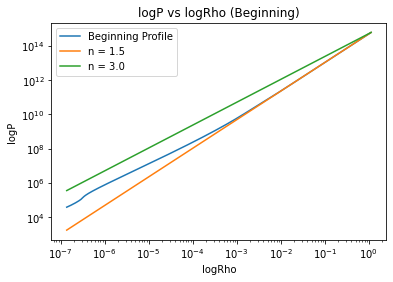

In [326]:
# plot beginning profiles
plt.figure()
plt.plot(10**profiles_1solarmass[0][1]['logRho'], 10**profiles_1solarmass[0][1]['logP'], label='Beginning Profile')
plt.plot(10**profiles_1solarmass[0][1]['logRho'], P15_beg, label='n = 1.5')
plt.plot(10**profiles_1solarmass[0][1]['logRho'], P3_beg, label='n = 3.0')
plt.title('logP vs logRho (Beginning)')
plt.xlabel('logRho')
plt.ylabel('logP')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

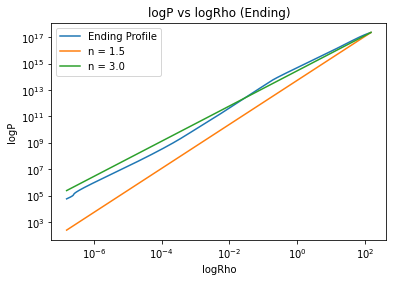

In [327]:
# plot ending profiles
plt.figure()
plt.plot(10**profiles_1solarmass[-1][1]['logRho'], 10**profiles_1solarmass[9][1]['logP'], label='Ending Profile')
plt.plot(10**profiles_1solarmass[-1][1]['logRho'], P15_end, label='n = 1.5')
plt.plot(10**profiles_1solarmass[-1][1]['logRho'], P3_end, label='n = 3.0')
plt.title('logP vs logRho (Ending)')
plt.xlabel('logRho')
plt.ylabel('logP')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

## Which polytrope provides the best approximation to the structure of the interior (the innermost few orders of magnitude of density) of the protostellar and current sun from the MESA model? 

The beginning profile is closer to the n = 1.5 polytrope.

The ending profile is closer to the n = 3.0 polytrope.

## What does this tell us about the heat transport mechanism for these two phases of the Sun's evolution? (Which of these polytropes is radiative and which is convective?)

The beginning profile is of a protostar, which should have a convective core. Polytropes with index $n = 1.5$ are used for stars with convective cores.

The ending profile is of the current-day sun, which has a radiative core. Polytropes with index $n = 3.0$ are used for main-sequence stars, like our sun, that have radiative cores.

# Part (c)

## Assuming a solar-mass star is roughly a polytrope with one of the values mentioned in part (b), use the polytropic properties discussed in section 7.2.1 of Hansen, Kawaler, & Trimble to estimate the central density and temperature (7.41 and 7.42) of the solar-mass model. (Assume gas pressure dominated and $\mu = 0.6$. Parameter values are given in Table 7.1 for various polytropic indices.) Evaluate for both provided indicies. (It is best to use the radius from your MESA model for this comparison rather than of the actual sun, if they differ.) 

In [328]:
# calculate central temperature
def T_c(n, xi, theta):
    M = const.M_sun
    R = 10**history_1solarmass['log_R'][-1] * const.R_sun
    mu = 0.6
    T_c = ((2.293E7 * mu) / ((n + 1) * (xi * theta))) * (R / const.R_sun)**(-1)
    return T_c

In [329]:
print('For n = 1.5, Central Temperature =', T_c(1.5, 3.6538, 0.20330))
print('For n = 3.0, Central Temperature =', T_c(3.0, 6.8969, 0.04243))

For n = 1.5, Central Temperature = 7386608.951814441
For n = 3.0, Central Temperature = 11718723.696538426


In [330]:
# calculate central density
def rho_c(xi, theta):
    rho_c = (1.0 / 3.0) * (xi / theta) * np.mean(10**profiles_1solarmass[9][1]['logRho'])
    return rho_c

In [331]:
print('For n = 1.5, Central Density =', rho_c(3.6538, 0.20330))
print('For n = 3.0, Central Density =', rho_c(6.8969, 0.04243))

For n = 1.5, Central Density = 62.74674815402345
For n = 3.0, Central Density = 567.4985130685787


## Compare these values to the central values reported by MESA. Note how the use of a simple polytropic model allows us to improve on our order of magnitude estimates of interior stellar quantities by providing a reasonable, although not exact, run of density and temperature.

In [343]:
print('Central Temperature:', 10**history_1solarmass['log_cntr_T'][-1])
print('Central Density:', 10**history_1solarmass['log_cntr_Rho'][-1])

Central Temperature: 15684449.566505538
Central Density: 151.5879267455433


We see that the central temperature and density is more consistent with the n = 3.0 polytrope for the current-age sun.

# Part (d)

## Compute $d\log P / d \log \rho = \frac{\rho}{P} \frac{dP}{d\rho}$ as a function of radius from your current-day sun MESA model by subtracting values at neigboring points (can be done with a simple script or in a spreadsheet) and plot it. Relate this to your results in part (b) and (c) by plotting the expectation for an $n = 3$ and $n = 1.5$ polytrope on the same plot. (These are horizontal lines on a plot of $d\log P / d \log \rho$.)

In [333]:
logP = profiles_1solarmass[-1][1]['logP']
logRho = profiles_1solarmass[-1][1]['logRho']
dlogP_dlogRho = np.gradient(logP, logRho)

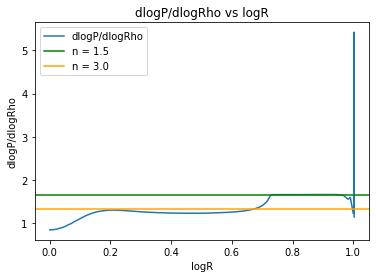

In [339]:
plt.figure()
plt.plot(10**profiles_1solarmass[-1][1]['logR'], dlogP_dlogRho, label='dlogP/dlogRho')
plt.axhline(1. + (1. / 1.5), color='green', label='n = 1.5')
plt.axhline(1. + (1. / 3.0), color='orange', label='n = 3.0')
plt.title('dlogP/dlogRho vs logR')
plt.xlabel('logR')
plt.ylabel('dlogP/dlogRho')
plt.legend()
plt.show()

From the plot we see the expected polytrope relationship with respect to the radius of the sun. The core is more radiative and the outer region near the surface is more convective. 

# Initial Code Block

## Import packages

In [161]:
# import packages
import matplotlib.pyplot as plt
import astropy
import astropy.constants as const
import astropy.units as units
import numpy as np
import glob
import os

## Helper Functions

In [1]:
# plot one profile on one plot
def plot_single_profile(x, y, profile, label, title, xlabel, ylabel, xscale, yscale):
    """
    PLOT ONE PROFILE
    
    x       = x-axis data
    y       = y-axis data
    profile = index number of profile to be plotted
    label   = name of array with sim data
    title   = title for plot
    xlabel  = x-axis label
    ylabel  = y-axis label
    xscale  = x-axis scale
    yscale  = y-axis scale
    
    Will return a plot for a specified profile
    """
    
    plt.plot(label[profile][1][x], label[profile][1][y], label=label[profile][0])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return(plt.show())

# plot all profiles on one plot
def plot_group_together(x, y, label, title, xlabel, ylabel, xscale, yscale):
    """
    PLOT ALL PROFILES ON ONE PLOT
    
    x      = x-axis data
    y      = y-axis data
    label  = name of array with sim data
    title  = title for plot
    xlabel = x-axis label
    ylabel = y-axis label
    xscale = x-axis scale
    yscale = y-axis scale
    
    Will return a single plot will all profiles plotted
    """
    
    for i in range(len(label)):
        plt.plot(label[i][1][x], label[i][1][y], label=label[i][0])
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xscale(xscale)
        plt.yscale(yscale)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return(plt.show())

# plot all profiles on individual plots
def plot_group_individual(x, y, label, title, xlabel, ylabel, xscale, yscale):
    """
    PLOT ALL PROFILES ON INDIVIDUAL PLOTS
    
    x      = x-axis data
    y      = y-axis data
    label  = name of array with sim data
    title  = title for plot
    xlabel = x-axis label
    ylabel = y-axis label
    xscale = x-axis scale
    yscale = y-axis scale
    
    Will return individual plots for each profile
    """
    
    for i in range(len(label)):
        plt.plot(label[i][1][x], label[i][1][y], label=label[i][0])
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xscale(xscale)
        plt.yscale(yscale)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.show()
    return(plt.show())

# plot history 
def plot_history(x, y, label, title, xlabel, ylabel, xscale, yscale):
    """
    PLOT HISTORY
    
    x      = x-axis data
    y      = y-axis data
    label  = name of array with sim data
    title  = title for plot
    xlabel = x-axis label
    ylabel = y-axis label
    xscale = x-axis scale
    yscale = y-axis scale
    
    Will return plot with desired history data
    """
    
    plt.plot(label[x], label[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale(xscale)
    plt.yscale(yscale)
    return(plt.show())

In [205]:
def data_loader(path):
    """
    DATA LOADER USING GENFROMTXT
    
    How to call:
    path = 'some/path/to/directory'
    array_name = data_loader(path)
    
    Parameters:
    path = string path to file
    
    Function:
    Will return an array with desired data
    """
    
    return np.genfromtxt(path, names=True, skip_header=5)

In [206]:
def profile_loader(path, array_name, sim_name):
    """
    PROFILE DATA LOADER USING GENFROMTXT
    
    How to call:
    path = 'some/path/to/directory'
    array_name = []
    profile_loader(path, array_name, sim_name)
    
    Parameters:
    path       = string path to desired directory
    array_name = name of initialized array
    sim_name   = name of sim/experiment
    
    Details:
    glob.glob     = easily find desired files
    sorted(, key) = order files ascending
    replace       = create name for each profile
    
    Array indexing [][][]:
    array_name[i][0]             = sim name profile#
    array_name[i][1].dtype       = array with profile headers
    array_name[i][1]['quantity'] = array of desired quanitity from specified profile
    
    Function:
    Will return return an array with MESA profiles
    """
    
    for file in sorted(glob.glob(path + 'profile*.data'), key=os.path.getmtime):
        array_name.append([file.replace(path, sim_name).replace('.data', ''), 
                           data_loader(file)])
    return array_name

## Initialize Paths and Load Files

In [207]:
# path to history
path_history_1solarmass = './experiment2/LOGS/history.data'

# path to profile index
path_index_1solarmass = './experiment2/LOGS/profiles.index'

# path to profile
path_profiles = './experiment2/LOGS/'

In [230]:
# load history files
history_1solarmass = data_loader(path_history_1solarmass)

# check history headers
print('history headers: \n', history_1solarmass[0].dtype)

# check model numbers
print(history_1solarmass['log_cntr_Rho'][78])

history headers: 
 [('model_number', '<f8'), ('num_zones', '<f8'), ('star_age', '<f8'), ('log_dt', '<f8'), ('star_mass', '<f8'), ('log_xmstar', '<f8'), ('log_abs_mdot', '<f8'), ('mass_conv_core', '<f8'), ('conv_mx1_top', '<f8'), ('conv_mx1_bot', '<f8'), ('conv_mx2_top', '<f8'), ('conv_mx2_bot', '<f8'), ('mx1_top', '<f8'), ('mx1_bot', '<f8'), ('mx2_top', '<f8'), ('mx2_bot', '<f8'), ('log_LH', '<f8'), ('log_LHe', '<f8'), ('log_LZ', '<f8'), ('log_Lnuc', '<f8'), ('pp', '<f8'), ('cno', '<f8'), ('tri_alfa', '<f8'), ('epsnuc_M_1', '<f8'), ('epsnuc_M_2', '<f8'), ('epsnuc_M_3', '<f8'), ('epsnuc_M_4', '<f8'), ('epsnuc_M_5', '<f8'), ('epsnuc_M_6', '<f8'), ('epsnuc_M_7', '<f8'), ('epsnuc_M_8', '<f8'), ('he_core_mass', '<f8'), ('c_core_mass', '<f8'), ('o_core_mass', '<f8'), ('si_core_mass', '<f8'), ('fe_core_mass', '<f8'), ('neutron_rich_core_mass', '<f8'), ('log_Teff', '<f8'), ('log_L', '<f8'), ('log_R', '<f8'), ('log_g', '<f8'), ('v_div_csound_surf', '<f8'), ('log_cntr_P', '<f8'), ('log_cntr_Rho'

In [209]:
# load profile index files
profile_index_1solarmass = data_loader(path_index_1solarmass)

# check profile index
print('1 solar mass profile index: \n', profile_index_1solarmass)

1 solar mass profile index: 
 [(250., 1.,  6.) (300., 1.,  7.) (324., 2.,  8.) (350., 1.,  9.)
 (383., 3., 10.)]


In [210]:
# load all profiles into array

# initialize profile arrays
profiles_1solarmass = []

# create sorted arrays with profile name and data
profile_loader(path_profiles, profiles_1solarmass, '1 solar mass ')

# check profiles and names
print('number of profiles in 1 solar mass:', len(profiles_1solarmass))
print('name of 1 solar mass profile 1:', profiles_1solarmass[0][0])

# check profile headers
print('profile headers: \n', profiles_1solarmass[0][1].dtype)

number of profiles in 1 solar mass: 10
name of 1 solar mass profile 1: 1 solar mass profile1
profile headers: 
 [('zone', '<f8'), ('mass', '<f8'), ('logR', '<f8'), ('logT', '<f8'), ('logRho', '<f8'), ('logP', '<f8'), ('x_mass_fraction_H', '<f8'), ('y_mass_fraction_He', '<f8'), ('z_mass_fraction_metals', '<f8')]
